In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df

,Unnamed: 0,name,meter_score,audience_score,rating,genre,cast,director,time,studio,runtime,box_office,movie_synopsis
0,0,Toy Story 3,98,89,G,"['Animation', 'Comedy', 'Kids & Family', 'Scie...","['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Ned...",['Lee Unkrich'],2010-06-18,['Walt Disney Pictures'],103,414984497.0,"""Toy Story 3"" welcomes Woody, Buzz and the who..."
1,1,True Grit,96,85,PG-13,"['Action & Adventure', 'Drama', 'Western']","['Hailee Steinfeld', 'Jeff Bridges', 'Matt Dam...","['Joel Coen', 'Ethan Coen']",2010-12-22,['Paramount Pictures'],110,171031347.0,Fourteen-year-old Mattie Ross (Hailee Steinfel...
2,2,How to Train Your Dragon,98,91,PG,"['Animation', 'Kids & Family', 'Science Fictio...","['Jay Baruchel', 'Gerard Butler', 'Craig Fergu...","['Dean DeBlois', 'Chris Sanders']",2010-03-26,"['Paramount', 'DWA']",98,216900000.0,The son of a Viking chief must capture a drago...
3,3,The King's Speech,95,92,PG-13,['Drama'],"['Colin Firth', 'Helena Bonham Carter', 'Geoff...",['Tom Hooper'],2010-11-26,['The Weinstein Company'],118,138300000.0,After the death of his father King George V (M...
4,4,Inside Job,98,91,PG-13,"['Documentary', 'Special Interest']","['Matt Damon', 'William Ackman', 'Daniel Alper...",['Charles Ferguson (III)'],2010-10-08,['Sony Pictures Classics'],108,4311834.0,"From Academy Award (R) nominated filmmaker, Ch..."
5,5,Restrepo,97,88,R,"['Documentary', 'Special Interest']","['Dan Kearney', 'Lamonta Caldwell', 'Kevin Ric...","['Sebastian Junger', 'Tim Hetherington']",2010-12-07,['National Geographic'],93,1330894.0,It is fairly extraordinary that this film exis...
6,6,127 Hours,93,85,R,['Drama'],"['James Franco', 'Amber Tamblyn', 'Kate Mara',...",['Danny Boyle'],2010-11-05,['Fox Searchlight'],94,18329466.0,"""127 Hours"" is the true story of mountain clim..."
7,7,Animal Kingdom,95,83,R,"['Art House & International', 'Drama']","['Ben Mendelsohn', 'Joel Edgerton', 'Guy Pearc...",['David Michôd'],2010-08-13,['Sony Pictures Classics'],112,1000000.0,Welcome to the Melbourne underworld. It's the ...
8,8,The Town,93,85,R,"['Action & Adventure', 'Drama', 'Mystery & Sus...","['Ben Affleck', 'Rebecca Hall', 'Jon Hamm', 'J...",['Ben Affleck'],2010-09-17,['Warner Bros. Pictures'],151,92173235.0,Boston bank robber Doug MacRay (Ben Affleck) f...
9,9,Marwencol,98,87,NR,"['Documentary', 'Science Fiction & Fantasy']",[],['Jeff Malmberg'],2010-10-08,['The Cinema Guild'],83,112036.0,"On April 8, 2000, Mark Hogancamp was brutally ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 13 columns):
Unnamed: 0        1163 non-null int64
name              1163 non-null object
meter_score       1163 non-null int64
audience_score    1163 non-null int64
rating            1163 non-null object
genre             1163 non-null object
cast              1163 non-null object
director          1163 non-null object
time              1163 non-null object
studio            1163 non-null object
runtime           1163 non-null int64
box_office        1163 non-null float64
movie_synopsis    1163 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 118.2+ KB


In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.misc import imread
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


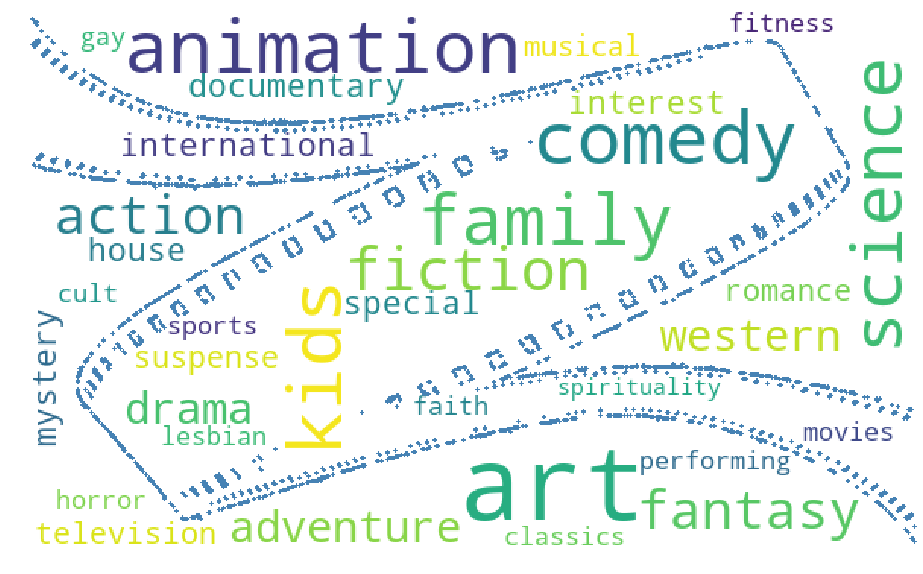

In [6]:
import nltk
from wordcloud import WordCloud, STOPWORDS
genre=df['genre'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(genre)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
origin_image = imread("films.jpg")
origin_mask = origin_image
words_without_stop = nltk.FreqDist(w for w in words if w not in stopwords) 
wc = WordCloud(stopwords=STOPWORDS,background_color='white',mask=origin_mask, contour_width=3, 
               contour_color='steelblue').generate(" ".join(words_without_stop))
plt.imshow(wc)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.axis('off')
plt.show()

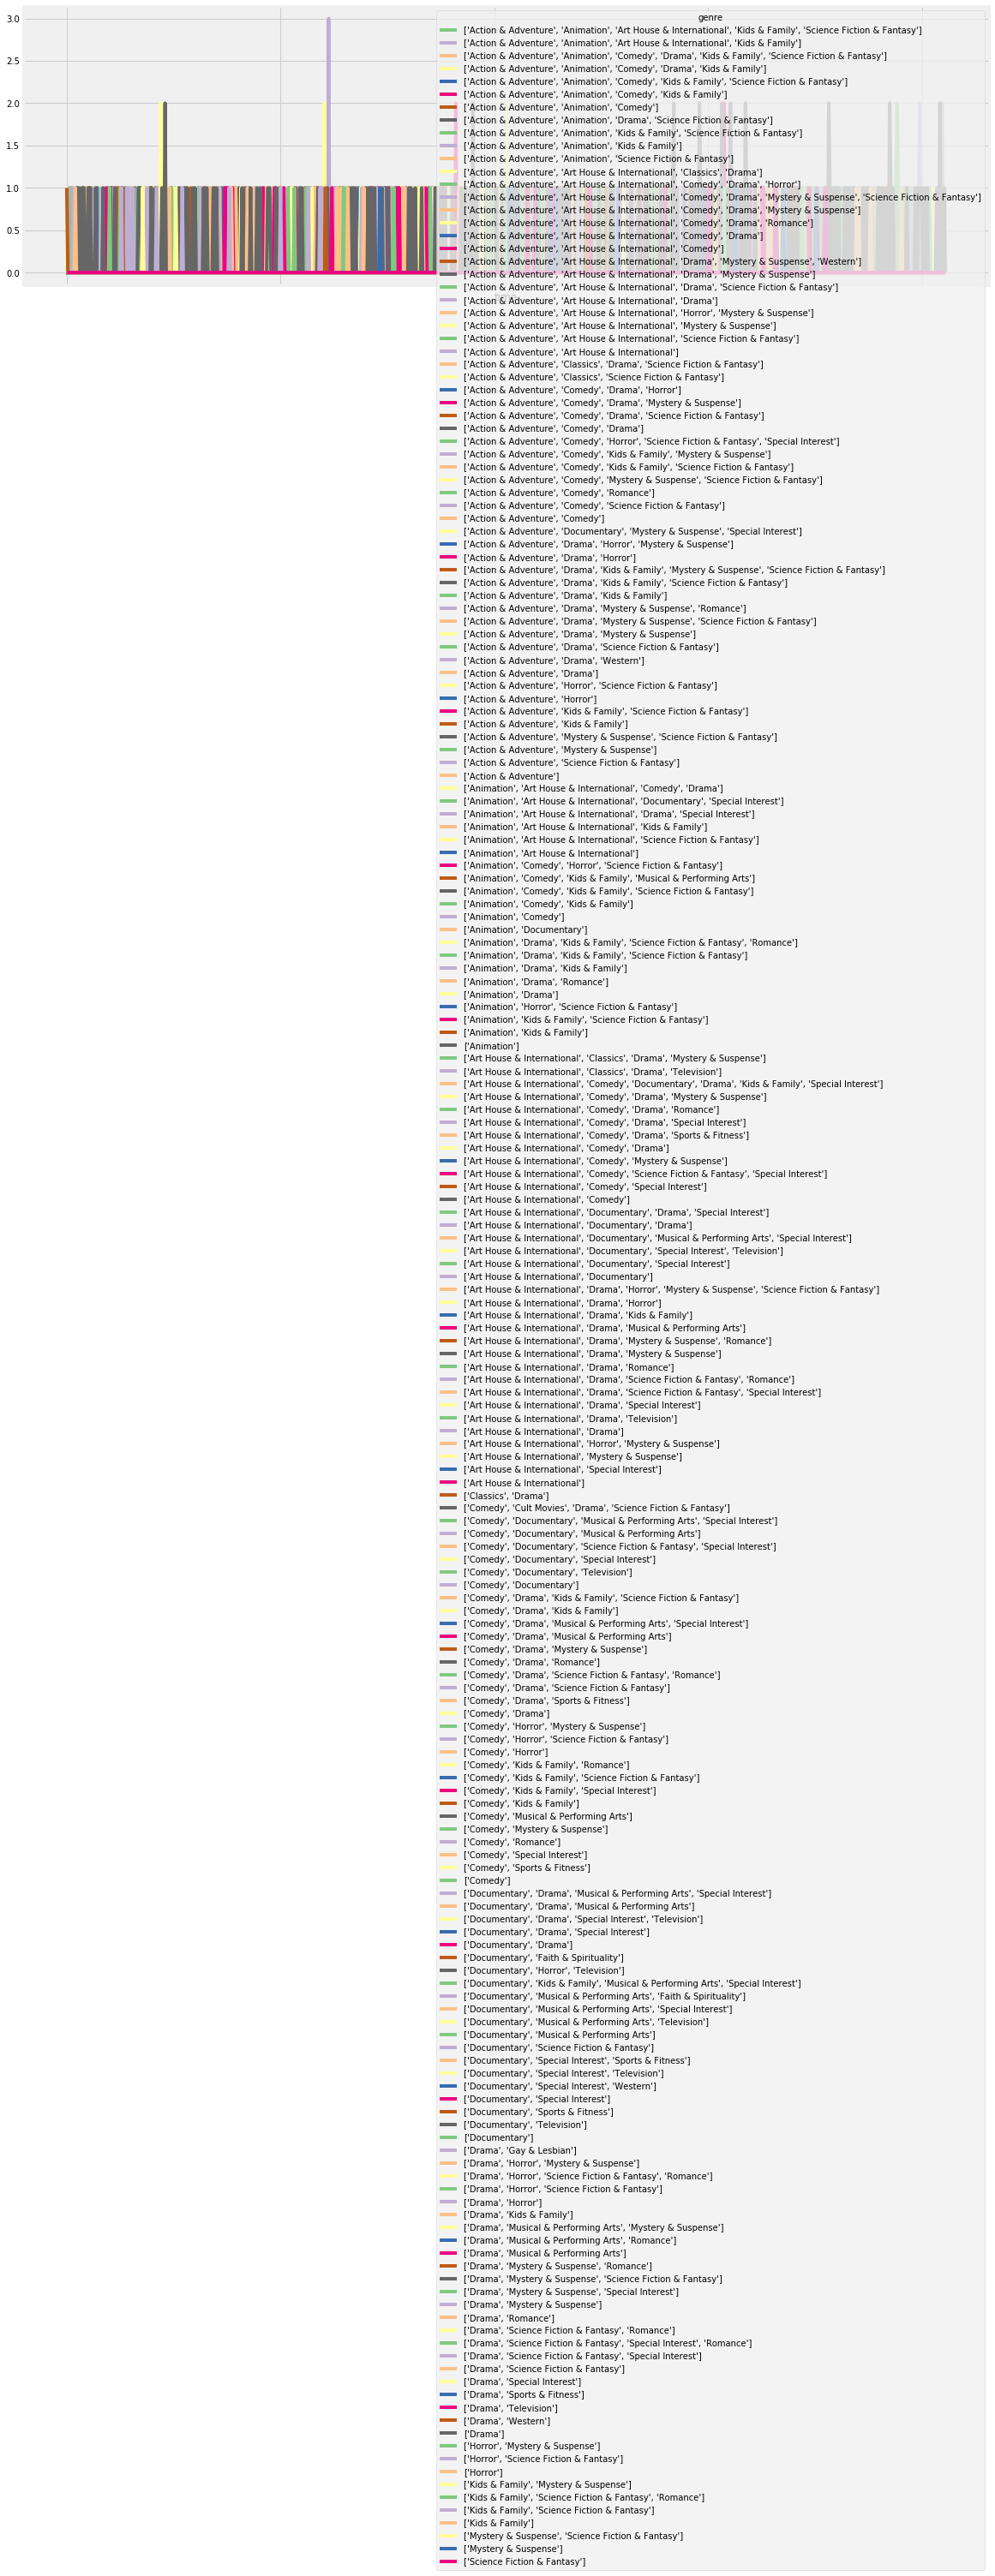

In [7]:
genre_year=pd.crosstab(df.time, df.genre)
genre_year.plot(color=sns.color_palette('Accent',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [8]:
df['director'].value_counts()

['Steven Soderbergh']                                                                                            8
['Christopher Nolan']                                                                                            7
['Steven Spielberg']                                                                                             7
['Jon Favreau']                                                                                                  7
['Werner Herzog']                                                                                                6
['Clint Eastwood']                                                                                               6
['Richard Linklater']                                                                                            6
['Martin Scorsese']                                                                                              6
['Ken Loach']                                                                   

In [9]:
vc = df['director'].value_counts()
u  = [i not in set(vc[vc==1].index) for i in df['director']]
dfnew1 = df[u]

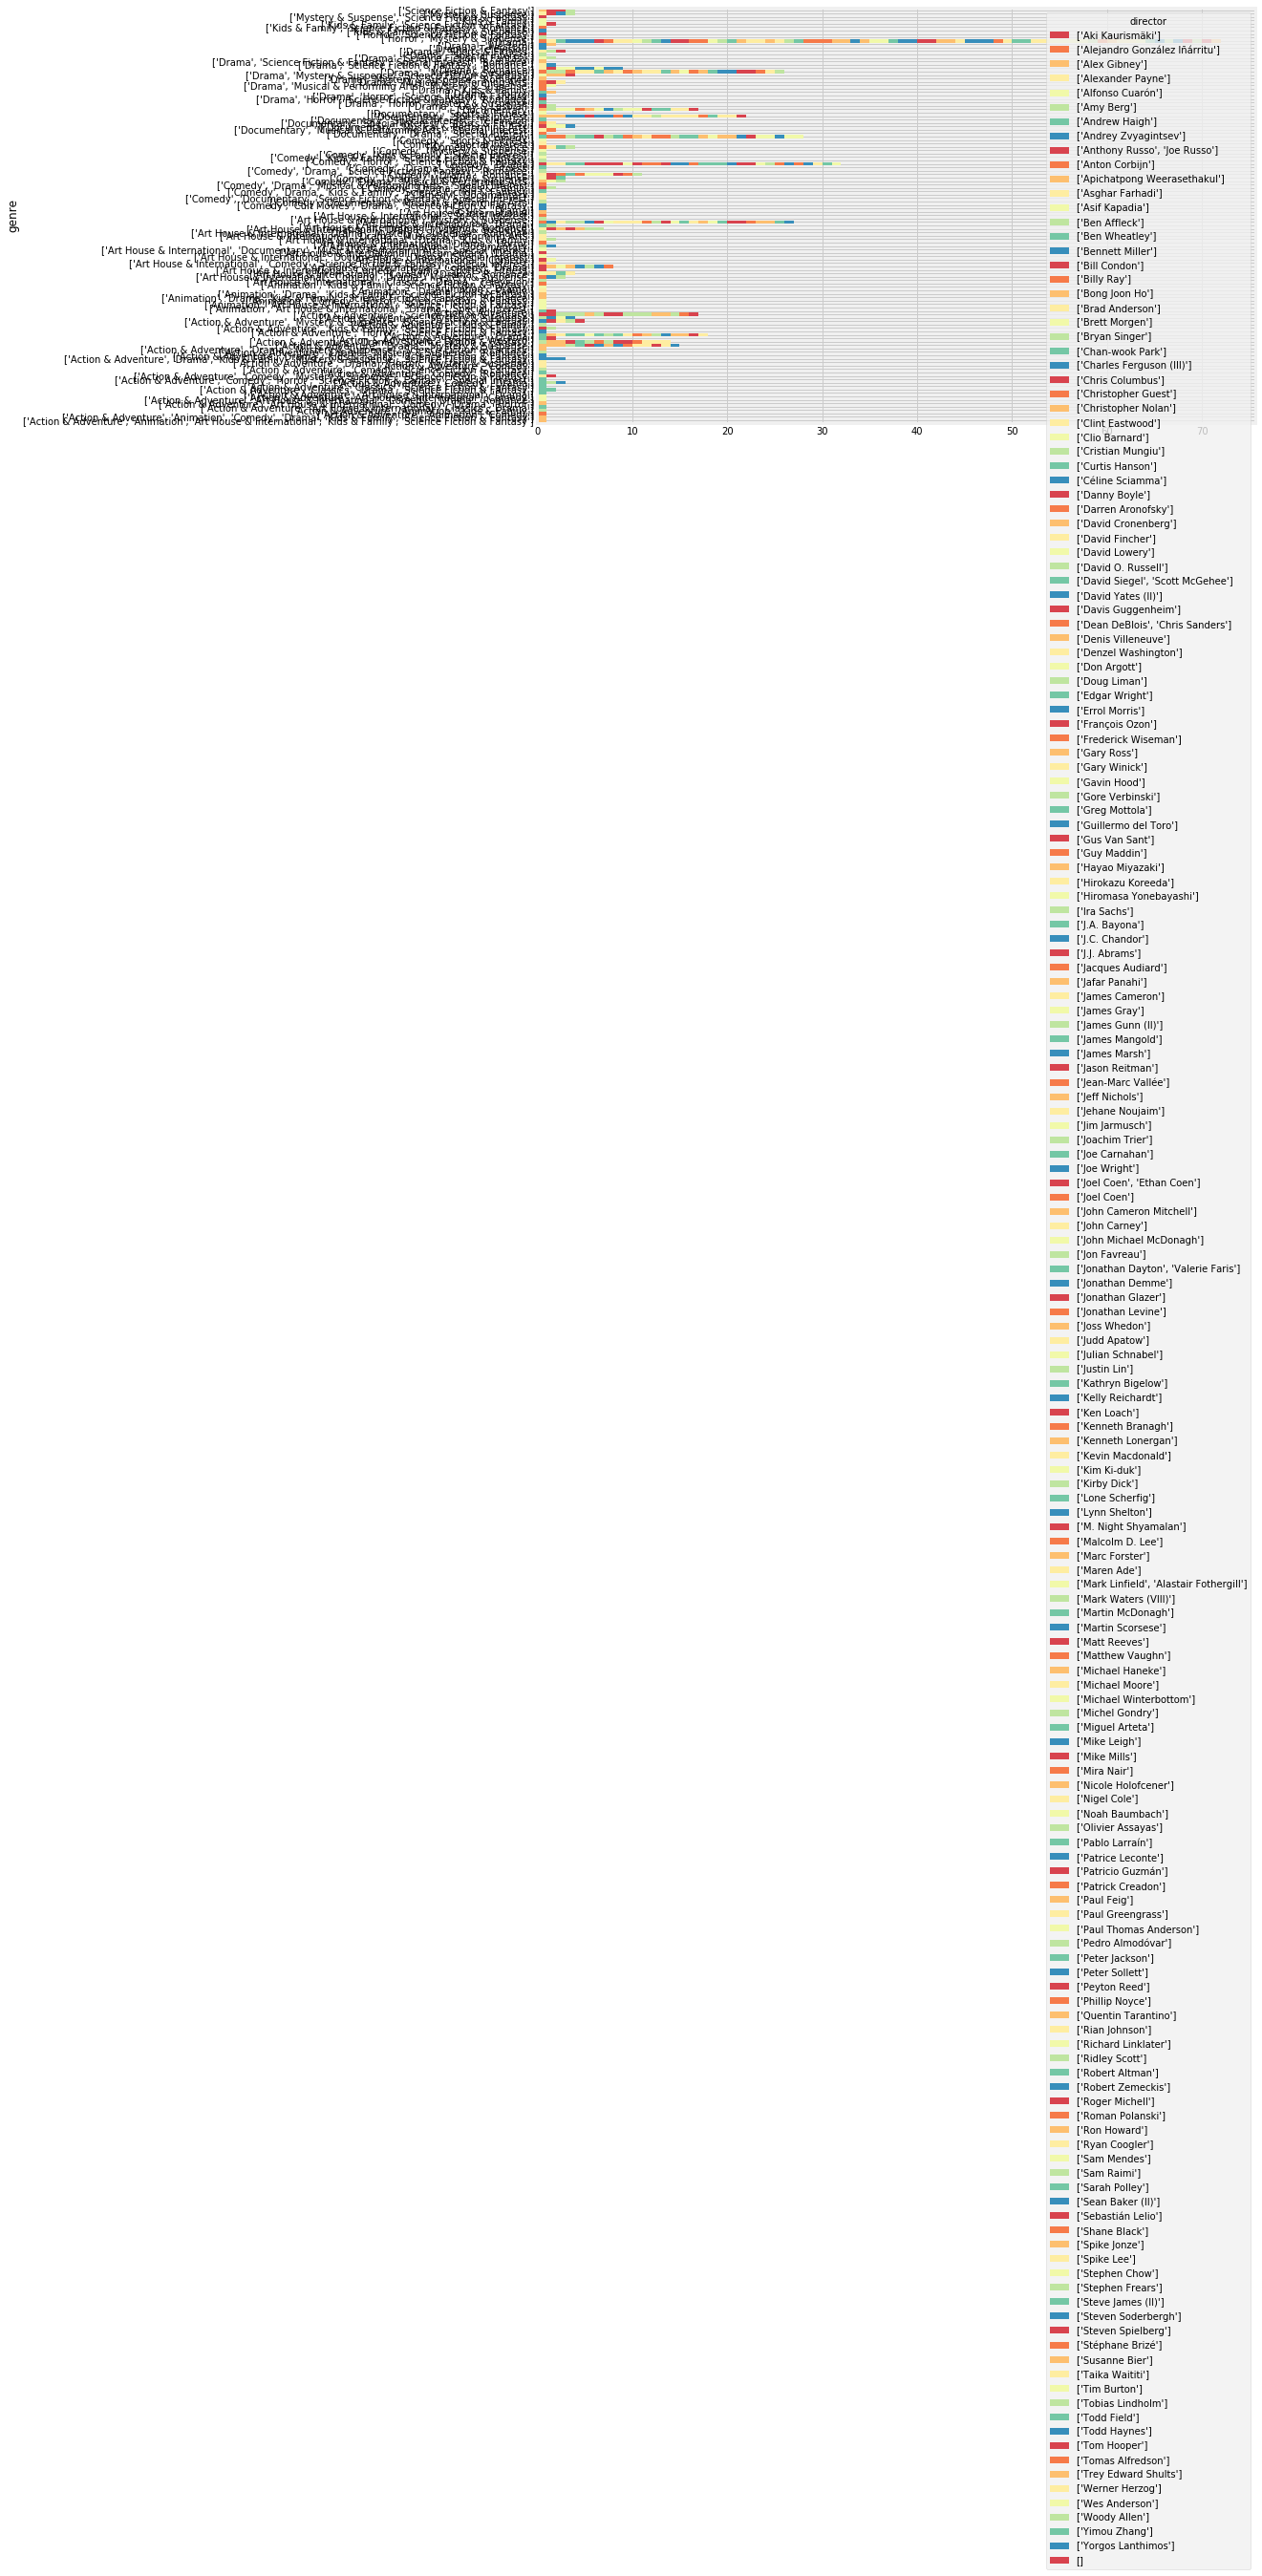

In [10]:
pd.crosstab(dfnew1.genre,dfnew1.director).plot.barh(stacked=True,width=1,color=sns.color_palette('Spectral',8))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

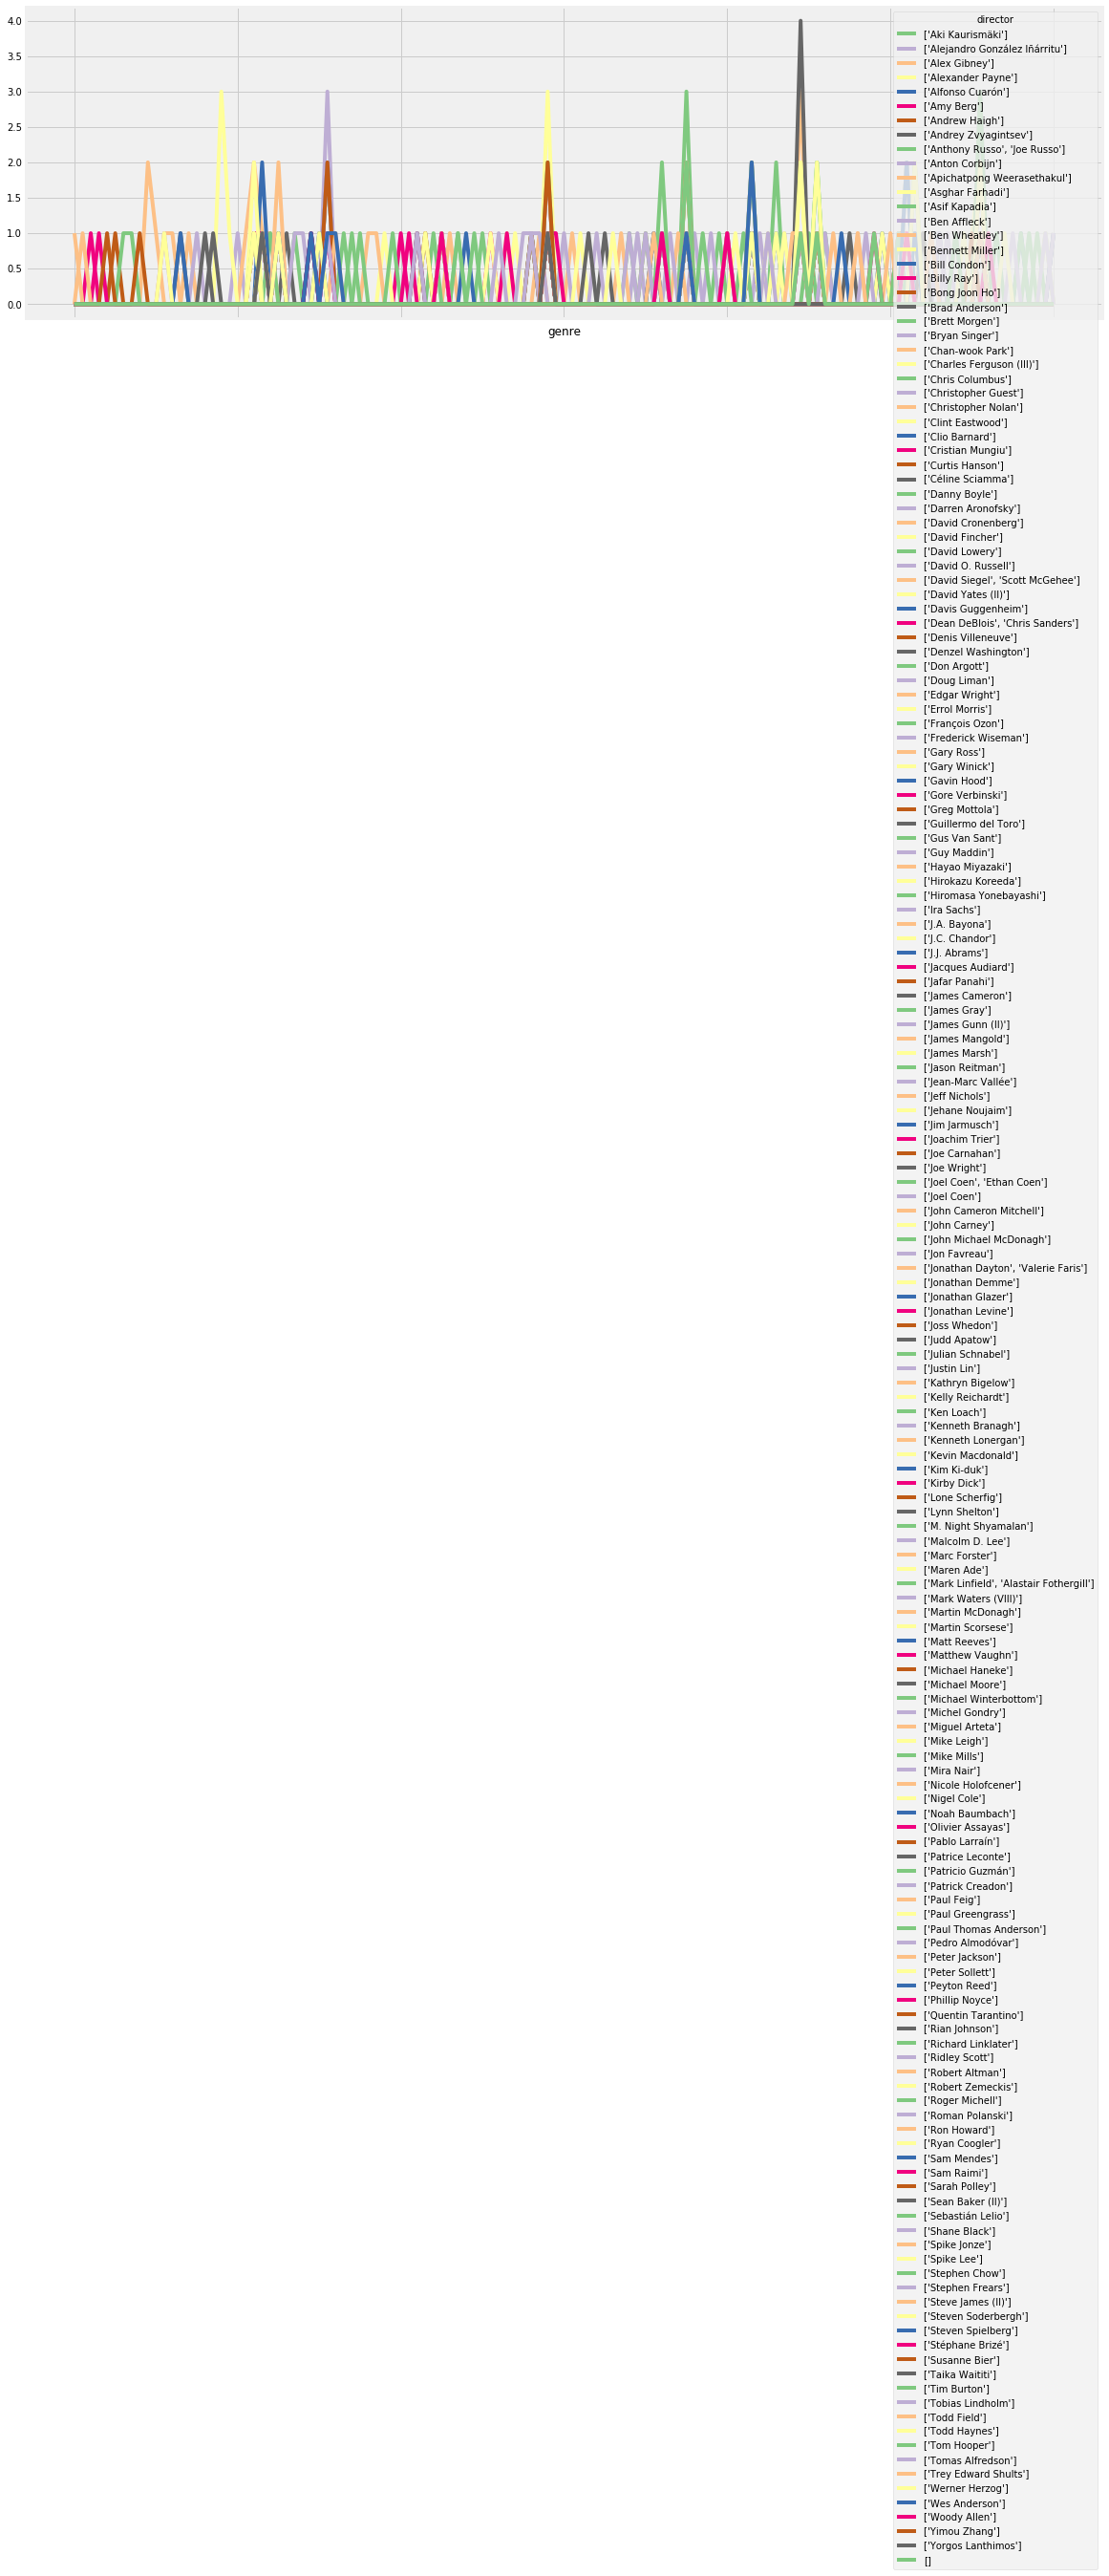

In [11]:
director_filming=pd.crosstab(dfnew1.genre, dfnew1.director)
director_filming.plot(color=sns.color_palette('Accent',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()